In [7]:
import pandas as pd
import re
import glob
import matplotlib.pyplot as plt
from cycler import cycler
from pywaffle import Waffle
import numpy as np
%matplotlib inline 

In [32]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.family': 'sans-serif',
    'font.sans-serif' : 'Tahoma',
    'axes.facecolor' : '#ffffff',
    'axes.axisbelow':True, 
    'axes.grid' : True,
    'grid.color' : '#bec0c2',
    'grid.linestyle' : 'dotted',
    'axes.spines.left'   : False,   
    'axes.spines.bottom' : False,
    'axes.spines.top'    : False,
    'axes.spines.right' : False,
    'axes.prop_cycle': cycler('color', ['#e81c61', '#ffb845', '#fc6b4a', '#f9f871', '#31517a', '#3f0092']),
    'xtick.bottom'  : False,
    'ytick.left': False,
    'figure.titlesize' : 'large', 
    'figure.titleweight' : 'bold',
    'figure.facecolor' : '#ffffff',
    'text.color' : '#595959',
    'axes.labelcolor' : '#595959',
    'xtick.color' : '#595959',
    'ytick.color' : '#595959',
    'legend.loc' : 'best',
    'legend.fancybox'    : True,
    'legend.frameon'     : True,
    'legend.edgecolor'     : '0.9',
    'legend.markerscale'   : '0.5',
    'lines.marker'      : None,
    'lines.markersize'  : 3,           
})

In [62]:
# show me EVERYTHING!
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 1000)

In [34]:
overall_df = pd.read_excel("2017-12-31-Thirteen_LLC_Investment_Summary.xlsx", sheet_name="SUMMARY")
overall_df

,NAME,Manager,Value,Unnamed: 3
0,ASHMORE WEALTH MANAGEMENT LLC,Nathan Brown,1918532000,NaN
1,"ARGYLL RESEARCH, LLC",Brian Davis,446327000,NaN
2,"CLIFTON PARK CAPITAL MANAGEMENT, LLC",Don Clouse,880518000,"Last known Form 13F filing was December 31, 2015"
3,CORTLAND ADVISERS LLC,Matthew Lawrence,2177742000,NaN
4,ELKFORK PARTNERS LLC,David Johnson,3687774000,NaN
5,FLINTON CAPITAL MANAGEMENT LLC,Alan Wilson,2943847000,NaN
6,GLEN HARBOR CAPITAL MANAGEMENT LLC,Kristy Woodward,4407275000,NaN
7,GREEN VALLEY INVESTORS LLC,Roger Evans,2098464000,NaN
8,MEADOW CREEK INVESTMENT MANAGEMENT LLC,Brad Barlow,4603236000,NaN
9,NEUBURGH ADVISERS LLC,Troy Nielsen,2791122000,NaN


In [35]:
overall_df = overall_df.drop([13, 14, 15, 16])

In [36]:
overall_df.dtypes
overall_df['Value'].astype(int)

0     1918532000
1      446327000
2      880518000
3     2177742000
4     3687774000
5     2943847000
6     4407275000
7     2098464000
8     4603236000
9     2791122000
10    2361388000
11    1598253000
12    2855436000
Name: Value, dtype: int64

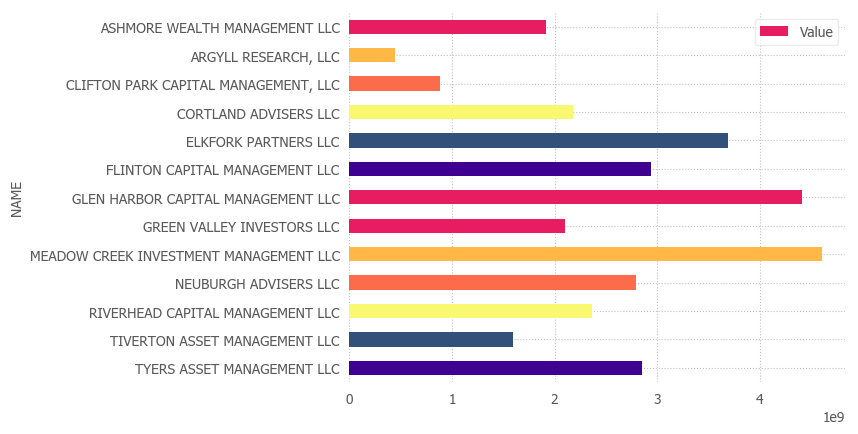

In [145]:
overall_df.plot(kind='barh', x='NAME', y='Value')
plt.gca().invert_yaxis()
plt.savefig("overall_value.pdf")

In [181]:
overall_df['value_float']=overall_df.Value.astype(float)

In [183]:
overall_df

,NAME,Manager,Value,Unnamed: 3,value_float
0,ASHMORE WEALTH MANAGEMENT LLC,Nathan Brown,1918532000,NaN,1.918532e+09
1,"ARGYLL RESEARCH, LLC",Brian Davis,446327000,NaN,4.463270e+08
2,"CLIFTON PARK CAPITAL MANAGEMENT, LLC",Don Clouse,880518000,"Last known Form 13F filing was December 31, 2015",8.805180e+08
3,CORTLAND ADVISERS LLC,Matthew Lawrence,2177742000,NaN,2.177742e+09
4,ELKFORK PARTNERS LLC,David Johnson,3687774000,NaN,3.687774e+09
5,FLINTON CAPITAL MANAGEMENT LLC,Alan Wilson,2943847000,NaN,2.943847e+09
6,GLEN HARBOR CAPITAL MANAGEMENT LLC,Kristy Woodward,4407275000,NaN,4.407275e+09
7,GREEN VALLEY INVESTORS LLC,Roger Evans,2098464000,NaN,2.098464e+09
8,MEADOW CREEK INVESTMENT MANAGEMENT LLC,Brad Barlow,4603236000,NaN,4.603236e+09
9,NEUBURGH ADVISERS LLC,Troy Nielsen,2791122000,NaN,2.791122e+09


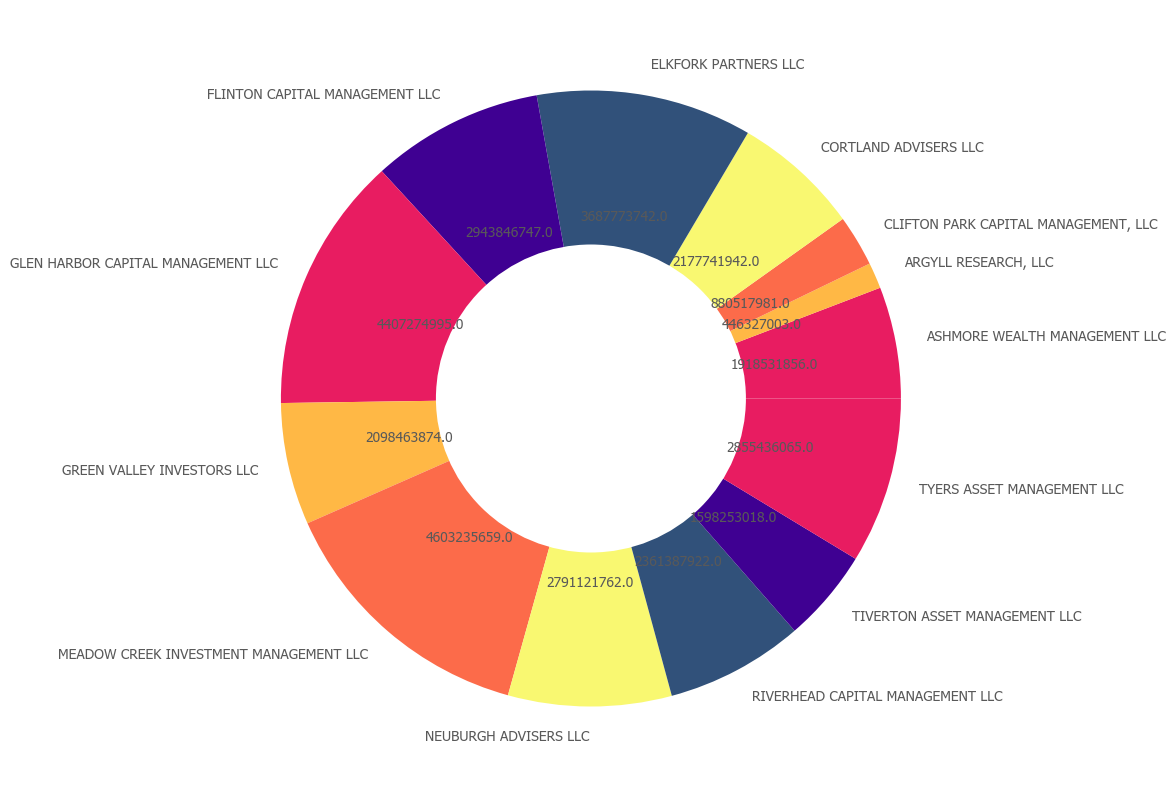

In [203]:
# overall_df.plot(kind='pie', x='NAME', y='Value', figsize=(6,6))
# centercircle = plt.Circle((0,0),0.5, fc='white')
# fig = plt.gcf()
# fig.gca().add_artist(centercircle)
# #plt.savefig("overall_value.pdf")

def absolute_value(val):
    a  = np.round(val/100*overall_df.value_float.sum(), 0)
    return a

ax = plt.pie(overall_df.Value, labels=overall_df.NAME, autopct=absolute_value)
fig = plt.gcf()
centercircle = plt.Circle((0,0),0.5, fc='white')
fig.gca().add_artist(centercircle)
fig.set_size_inches(10,10)
plt.savefig("overall_value_pie.pdf")

In [177]:
overall_df.Value

0     1918532000
1     446327000 
2     880518000 
3     2177742000
4     3687774000
5     2943847000
6     4407275000
7     2098464000
8     4603236000
9     2791122000
10    2361388000
11    1598253000
12    2855436000
Name: Value, dtype: object

In [173]:
# Read in each sheet name separately and then concatenate, since I may need separate dataframes too
# LLC #1
ashmore_df = pd.read_excel("2017-12-31-Thirteen_LLC_Investment_Summary.xlsx", sheet_name="ASHMORE WEALTH MANAGEMENT LLC")
ashmore_df.head()

,Security,Unnamed: 1,Imputed Share Price,Prev Shares,Current Shares,Change (Percent),Prev Value (USD x1000),Current Value (USD x1000),Change (Percent).1
0,"AAPL / Apple, Inc.",NaN,169.23,1582096.0,1465044,-7.40,243833.0,247929,1.68
1,"ADBE / Adobe Systems, Inc.",NaN,175.24,291935.0,270254,-7.43,43551.0,47359,8.74
2,"AMAT / Applied Materials, Inc.",NaN,51.12,1080222.0,1000217,-7.41,56269.0,51131,-9.13
3,AOS / Smith (A.O.) Corp.,NaN,61.28,78897.0,86085,9.11,4689.0,5275,12.50
4,"CAT / Caterpillar, Inc.",NaN,157.59,NaN,62600,NaN,NaN,9865,NaN


In [40]:
# LLC #2
argyll_df = pd.read_excel("2017-12-31-Thirteen_LLC_Investment_Summary.xlsx", sheet_name="ARGYLL RESEARCH, LLC")
argyll_df.head()

,Security,Unnamed: 1,Imputed Share Price,Prev Shares,Current Shares,Change (Percent),Prev Value (USD x1000),Current Value (USD x1000),Change (Percent).1
0,EPD / Enterprise Products Partners L.P.,NaN,26.51,11678413,12956840,10.95,304457,343487,12.82
1,"TCP / TC Pipelines, LP",NaN,53.10,1621308,1666244,2.77,84828,88477,4.30
2,"BPL / Buckeye Partners, L.P.",NaN,49.55,156218,102943,-34.10,8904,5101,-42.71
3,EQM / EQT Midstream Partners LP,NaN,73.10,109352,63789,-41.67,8198,4663,-43.12
4,"TEP / Tallgrass Energy Partners, LP",NaN,45.85,166668,100313,-39.81,7982,4599,-42.38


In [41]:
# LLC #3
# Last known Form 13F filing was December 31, 2015 for this one (All others are 12/31/2017)
clifton_df = pd.read_excel("2017-12-31-Thirteen_LLC_Investment_Summary.xlsx", sheet_name="CLIFTON PARK CAPITAL MANAGEMENT")
clifton_df.head()

,Security,Unnamed: 1,Imputed Share Price,Prev Shares,Current Shares,Change (Percent),Prev Value (USD x1000),Current Value (USD x1000),Change (Percent).1
0,ACTG / Acacia Research Corp.,NaN,NaN,850000,0,-100.00,7718,0,-100.00
1,AIRM / Air Methods Corp.,NaN,41.93,1678150,460861,-72.54,57208,19324,-66.22
2,"CLVS / Clovis Oncology, Inc.",NaN,35.00,882891,612500,-30.63,81190,21438,-73.60
3,"DORM / Dorman Products, Inc.",NaN,47.47,1536000,996455,-35.13,78167,47302,-39.49
4,EARS / Auris Medical Holding AG,NaN,4.89,1553300,1553300,0.00,5529,7596,37.38


In [42]:
# LLC #4
cortland_df = pd.read_excel("2017-12-31-Thirteen_LLC_Investment_Summary.xlsx", sheet_name="CORTLAND ADVISERS LLC")
cortland_df.head()

,Security,Unnamed: 1,Imputed Share Price,Prev Shares,Current Shares,Change (Percent),Prev Value (USD x1000),Current Value (USD x1000),Change (Percent).1
0,"AEP / American Electric Power Company, Inc.",NaN,73.57,213532.0,197851,-7.34,14998.0,14556,-2.95
1,"AMG / Affiliated Managers Group, Inc.",NaN,205.24,48188.0,44664,-7.31,9148.0,9167,0.21
2,AMT / American Tower Corp. (REIT),NaN,142.67,478824.0,443292,-7.42,65446.0,63244,-3.36
3,AON / Aon Plc,NaN,134.00,207434.0,192109,-7.39,30306.0,25743,-15.06
4,BAC / Bank of America Corp.,NaN,29.52,3742494.0,3465223,-7.41,94835.0,102294,7.87


In [43]:
# LLC #5
elkfork_df = pd.read_excel("2017-12-31-Thirteen_LLC_Investment_Summary.xlsx", sheet_name="ELKFORK PARTNERS LLC")
elkfork_df.head()

,Security,Unnamed: 1,Imputed Share Price,Prev Shares,Current Shares,Change (Percent),Prev Value (USD x1000),Current Value (USD x1000),Change (Percent).1
0,"A / Agilent Technologies, Inc.",NaN,67.02,8470.0,9504,12.21,544.0,637,17.10
1,AAL / American Airlines Group Inc.,NaN,52.03,158116.0,96712,-38.83,7509.0,5032,-32.99
2,"AAN / Aaron's, Inc.",NaN,39.91,5368.0,6314,17.62,234.0,252,7.69
3,"AAON / AAON, Inc.",NaN,36.72,25454.0,18766,-26.27,878.0,689,-21.53
4,"AAP / Advance Auto Parts, Inc.",NaN,99.65,4334.0,4576,5.58,430.0,456,6.05


In [44]:
# LLC #6
flinton_df = pd.read_excel("2017-12-31-Thirteen_LLC_Investment_Summary.xlsx", sheet_name="FLINTON CAPITAL MANAGEMENT LLC")
flinton_df.head()

,Security,Unnamed: 1,Imputed Share Price,Prev Shares,Current Shares,Change (Percent),Prev Value (USD x1000),Current Value (USD x1000),Change (Percent).1
0,AA / Alcoa Corp.,NaN,53.86,0.0,56588,NaN,0.0,3048,NaN
1,"AAOI / Applied Optoelectronics, Inc.",NaN,37.82,2312.0,2856,23.53,149.0,108,-27.52
2,"AAPL / Apple, Inc.",NaN,169.23,1368534.0,1317092,-3.76,210919.0,222892,5.68
3,AATDF / AA LTD,NaN,27.24,24174.0,29070,20.25,601.0,792,31.78
4,"AAWW / Atlas Air Worldwide Holdings, Inc.",NaN,58.79,1504.0,1888,25.53,99.0,111,12.12


In [47]:
# LLC #7
glen_df = pd.read_excel("2017-12-31-Thirteen_LLC_Investment_Summary.xlsx", sheet_name="GLEN HARBOR CAPITAL MANAGEMENT ")
glen_df.head()

,Security,Unnamed: 1,Imputed Share Price,Prev Shares,Current Shares,Change (Percent),Prev Value (USD x1000),Current Value (USD x1000),Change (Percent).1
0,"A / Agilent Technologies, Inc.",NaN,66.99,13090.0,14688,12.21,840.0,984,17.14
1,AA / Alcoa Corp.,NaN,53.87,0.0,32336,NaN,0.0,1742,NaN
2,AAL / American Airlines Group Inc.,NaN,52.03,124234.0,75988,-38.83,5900.0,3954,-32.98
3,"AAN / Aaron's, Inc.",NaN,39.86,8296.0,9758,17.62,362.0,389,7.46
4,"AAON / AAON, Inc.",NaN,36.69,39338.0,29002,-26.27,1356.0,1064,-21.53


In [48]:
# LLC #8
green_df = pd.read_excel("2017-12-31-Thirteen_LLC_Investment_Summary.xlsx", sheet_name="GREEN VALLEY INVESTORS LLC")
green_df.head()

,https://fintel.io/i/green-valley-investors-llc,Unnamed: 1,Imputed Share Price,Prev Shares,Current Shares,Change (Percent),Prev Value (USD x1000),Current Value (USD x1000),Change (Percent).1
0,ABT / Abbott Laboratories,NaN,57.07,2114617,1957900,-7.41,112836,111737,-0.97
1,"AMZN / Amazon.com, Inc.",NaN,1169.47,143019,143773,0.53,137492,168138,22.29
2,"APD / Air Products & Chemicals, Inc.",NaN,164.08,292769,271141,-7.39,44272,44489,0.49
3,CELG / Celgene Corp.,NaN,104.36,1406054,1301872,-7.41,205031,135863,-33.74
4,CL / Colgate-Palmolive Co.,NaN,75.45,78903,72998,-7.48,5748,5508,-4.18


In [49]:
# LLC #9
meadow_df = pd.read_excel("2017-12-31-Thirteen_LLC_Investment_Summary.xlsx", sheet_name="MEADOW CREEK INVESTMENT MANAGEM")
meadow_df.head()

,Security,Unnamed: 1,Imputed Share Price,Prev Shares,Current Shares,Change (Percent),Prev Value (USD x1000),Current Value (USD x1000),Change (Percent).1
0,"A / Agilent Technologies, Inc.",NaN,66.96,10780.0,12096,12.21,692.0,810,17.05
1,AAL / American Airlines Group Inc.,NaN,52.03,191998.0,117436,-38.83,9118.0,6110,-32.99
2,"AAN / Aaron's, Inc.",NaN,39.82,6832.0,8036,17.62,298.0,320,7.38
3,"AAOI / Applied Optoelectronics, Inc.",NaN,37.95,1088.0,1344,23.53,70.0,51,-27.14
4,"AAON / AAON, Inc.",NaN,36.72,32396.0,23884,-26.27,1117.0,877,-21.49


In [50]:
# LLC #10
neuburgh_df = pd.read_excel("2017-12-31-Thirteen_LLC_Investment_Summary.xlsx", sheet_name="NEUBURGH ADVISERS LLC")
neuburgh_df.head()

,Security,Unnamed: 1,Imputed Share Price,Prev Shares,Current Shares,Change (Percent),Prev Value (USD x1000),Current Value (USD x1000),Change (Percent).1
0,AA / Alcoa Corp.,NaN,53.88,0.0,68714,NaN,0.0,3702,NaN
1,AAL / American Airlines Group Inc.,NaN,52.02,90352.0,55264,-38.83,4291.0,2875,-33.00
2,"AAOI / Applied Optoelectronics, Inc.",NaN,37.88,1496.0,1848,23.53,97.0,70,-27.84
3,"AAPL / Apple, Inc.",NaN,169.23,885522.0,852236,-3.76,136477.0,144224,5.68
4,AAT / American Assets Trust Inc,NaN,38.18,3296.0,4112,24.76,131.0,157,19.85


In [51]:
# LLC #11
riverhead_df = pd.read_excel("2017-12-31-Thirteen_LLC_Investment_Summary.xlsx", sheet_name="RIVERHEAD CAPITAL MANAGEMENT LL")
riverhead_df.head()

,Security,Unnamed: 1,Imputed Share Price,Prev Shares,Current Shares,Change (Percent),Prev Value (USD x1000),Current Value (USD x1000),Change (Percent).1,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,74348TAL6 / Prospect Capital Corp. 5.75% Bond ...,NaN,1.00,800000.0,800000,0.00,812.0,804,-0.99,NaN,NaN,NaN
1,74348TAQ5 / Prospect Capital Corp. 4.75% Bond ...,NaN,1.01,10000000.0,10000000,0.00,10109.0,10075,-0.34,NaN,NaN,NaN
2,85571BAC9 / Starwood Property Trust Inc Bond,NaN,NaN,19005000.0,0,-100.00,19011.0,0,-100.00,NaN,NaN,NaN
3,88163VAE9 / Teva Pharmaceutical Fin Llc Bond,NaN,0.88,NaN,20000000,NaN,NaN,17603,NaN,NaN,NaN,NaN
4,"A / Agilent Technologies, Inc.",NaN,66.97,6915.0,7048,1.92,444.0,472,6.31,NaN,NaN,NaN


In [52]:
# LLC #12
tiverton_df = pd.read_excel("2017-12-31-Thirteen_LLC_Investment_Summary.xlsx", sheet_name="TIVERTON ASSET MANAGEMENT LLC")
tiverton_df.head()

,Security,Unnamed: 1,Imputed Share Price,Prev Shares,Current Shares,Change (Percent),Prev Value (USD x1000),Current Value (USD x1000),Change (Percent).1
0,"A / Agilent Technologies, Inc.",NaN,66.91,NaN,4603,NaN,NaN,308,NaN
1,AAL / American Airlines Group Inc.,NaN,51.93,NaN,6509,NaN,NaN,338,NaN
2,"AAON / AAON, Inc.",NaN,36.71,122320.0,81186,-33.63,4217.0,2980,-29.33
3,"AAPL / Apple, Inc.",NaN,169.23,382192.0,414096,8.35,58904.0,70078,18.97
4,AATDF / AA LTD,NaN,27.25,NaN,5945,NaN,NaN,162,NaN


In [53]:
# LLC #13
tyers_df = pd.read_excel("2017-12-31-Thirteen_LLC_Investment_Summary.xlsx", sheet_name="TYERS ASSET MANAGEMENT LLC")
tyers_df.head()

,Security,Unnamed: 1,Imputed Share Price,Prev Shares,Current Shares,Change (Percent),Prev Value (USD x1000),Current Value (USD x1000),Change (Percent).1
0,"A / Agilent Technologies, Inc.",NaN,66.98,6160.0,6912,12.21,395.0,463,17.22
1,AA / Alcoa Corp.,NaN,53.87,0.0,44462,NaN,0.0,2395,NaN
2,"AAN / Aaron's, Inc.",NaN,39.85,3904.0,4592,17.62,170.0,183,7.65
3,"AAOI / Applied Optoelectronics, Inc.",NaN,37.84,1904.0,2352,23.53,123.0,89,-27.64
4,"AAON / AAON, Inc.",NaN,36.71,18512.0,13648,-26.27,638.0,501,-21.47


In [60]:
frames = [ashmore_df, argyll_df, clifton_df, cortland_df, elkfork_df, flinton_df, glen_df, green_df, meadow_df, neuburgh_df, riverhead_df, tiverton_df, tyers_df]
everything_df = pd.concat(frames, sort=False)
everything_df.head()

,Security,Unnamed: 1,Imputed Share Price,Prev Shares,Current Shares,Change (Percent),Prev Value (USD x1000),Current Value (USD x1000),Change (Percent).1,https://fintel.io/i/green-valley-investors-llc,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,"AAPL / Apple, Inc.",NaN,169.23,1582096.0,1465044,-7.40,243833.0,247929,1.68,NaN,NaN,NaN,NaN
1,"ADBE / Adobe Systems, Inc.",NaN,175.24,291935.0,270254,-7.43,43551.0,47359,8.74,NaN,NaN,NaN,NaN
2,"AMAT / Applied Materials, Inc.",NaN,51.12,1080222.0,1000217,-7.41,56269.0,51131,-9.13,NaN,NaN,NaN,NaN
3,AOS / Smith (A.O.) Corp.,NaN,61.28,78897.0,86085,9.11,4689.0,5275,12.50,NaN,NaN,NaN,NaN
4,"CAT / Caterpillar, Inc.",NaN,157.59,NaN,62600,NaN,NaN,9865,NaN,NaN,NaN,NaN,NaN


In [69]:
everything_df.shape

(8689, 13)

In [71]:
everything_df.dtypes

Security                                          object 
Unnamed: 1                                        float64
Imputed\nShare Price                              float64
Prev\nShares                                      float64
Current\nShares                                   int64  
Change\n(Percent)                                 float64
Prev Value\n(USD x1000)                           float64
Current Value\n(USD x1000)                        int64  
Change\n(Percent).1                               float64
https://fintel.io/i/green-valley-investors-llc    object 
Unnamed: 9                                        float64
Unnamed: 10                                       float64
Unnamed: 11                                       float64
dtype: object

In [124]:
# What companies appear the most across all the LLCs?
# everything_df.Security.value_counts().count() # 1635 total companies invested in
everything_df.Security.value_counts()

NWS / News Corp                                                    10
APTV / Aptiv PLC                                                   10
RBA / Ritchie Bros. Auctioneers Inc.                               8 
SNA / Snap-On Inc.                                                 8 
AMAT / Applied Materials, Inc.                                     7 
AEP / American Electric Power Company, Inc.                        7 
D / Dominion Resources, Inc.                                       7 
ICE / Intercontinental Exchange, Inc.                              7 
ITW / Illinois Tool Works, Inc.                                    7 
SPG / Simon Property Group, Inc.                                   7 
JCI / Johnson Controls International plc                           7 
MD / Mednax, Inc.                                                  7 
FTV / Fortive Corporation                                          7 
AMG / Affiliated Managers Group, Inc.                              7 
JBHT / Hunt (J.B.) T

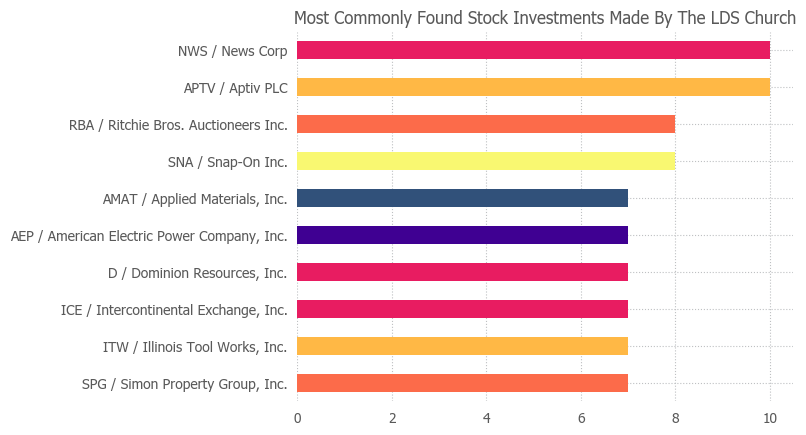

In [139]:
everything_df.Security.value_counts().head(10).plot(kind='barh', title='Most Commonly Found Stock Investments Made By The LDS Church')
plt.gca().invert_yaxis()

In [73]:
everything_df['Current Value\n(USD x1000)'].sum()

32769914

In [99]:
everything_df['Current Value\n(USD x1000)'].nlargest(n=10, keep='first')

0      343487
17     292653
11     290439
9      264743
0      247929
2      222892
18     201490
10     184585
6      183558
524    180511
Name: Current Value\n(USD x1000), dtype: int64

In [100]:
everything_df['Current Value\n(USD x1000)'].sort_values(ascending=False).head(10)

0      343487
17     292653
11     290439
9      264743
0      247929
2      222892
18     201490
10     184585
6      183558
524    180511
Name: Current Value\n(USD x1000), dtype: int64

In [92]:
# Top 10 holdings are in these companies
top10_df = everything_df[everything_df['Current Value\n(USD x1000)'] >= 180511]
top10_df
# oops! Forgot to consider duplicates (different LLCs investing in the same companies)

,Security,Unnamed: 1,Imputed Share Price,Prev Shares,Current Shares,Change (Percent),Prev Value (USD x1000),Current Value (USD x1000),Change (Percent).1,https://fintel.io/i/green-valley-investors-llc,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,"AAPL / Apple, Inc.",NaN,169.23,1582096.0,1465044,-7.40,243833.0,247929,1.68,NaN,NaN,NaN,NaN
10,GOOGL / Alphabet Inc.,NaN,1053.40,189245.0,175228,-7.41,184272.0,184585,0.17,NaN,NaN,NaN,NaN
17,MSFT / Microsoft Corp.,NaN,85.54,3694889.0,3421238,-7.41,275232.0,292653,6.33,NaN,NaN,NaN,NaN
0,EPD / Enterprise Products Partners L.P.,NaN,26.51,11678413.0,12956840,10.95,304457.0,343487,12.82,NaN,NaN,NaN,NaN
11,"MD / Mednax, Inc.",NaN,71.66,3853000.0,4053000,5.19,295872.0,290439,-1.84,NaN,NaN,NaN,NaN
18,SNA / Snap-On Inc.,NaN,171.43,1263850.0,1175350,-7.00,190766.0,201490,5.62,NaN,NaN,NaN,NaN
2,"AAPL / Apple, Inc.",NaN,169.23,1368534.0,1317092,-3.76,210919.0,222892,5.68,NaN,NaN,NaN,NaN
9,NaN,NaN,74.64,3830664.0,3546932,-7.41,242558.0,264743,9.15,ESRX / Express Scripts Holding Co.,NaN,NaN,NaN
524,GOOGL / Alphabet Inc.,NaN,1053.40,187408.0,171360,-8.56,182483.0,180511,-1.08,NaN,NaN,NaN,NaN
6,"AAPL / Apple, Inc.",NaN,169.23,1127028.0,1084664,-3.76,173698.0,183558,5.68,NaN,NaN,NaN,NaN


In [150]:
# sum of all holdings for companies across all LLCs
everything_df.groupby(by='Security', sort=True)['Current Value\n(USD x1000)'].sum()

Security
74348TAL6 / Prospect Capital Corp. 5.75% Bond due 2018-03-15       804    
74348TAQ5 / Prospect Capital Corp. 4.75% Bond due 2020-04-15       10075  
85571BAC9 / Starwood Property Trust Inc Bond                       0      
88163VAE9 / Teva Pharmaceutical Fin Llc Bond                       17603  
A / Agilent Technologies, Inc.                                     3674   
AA / Alcoa Corp.                                                   13608  
AAL / American Airlines Group Inc.                                 21441  
AAN / Aaron's, Inc.                                                1347   
AAOI / Applied Optoelectronics, Inc.                               401    
AAON / AAON, Inc.                                                  6236   
AAP / Advance Auto Parts, Inc.                                     2457   
AAPL / Apple, Inc.                                                 1004922
AAT / American Assets Trust Inc                                    1156   
AATDF / AA LTD  

In [119]:
# Top 10 holdings are in these companies
everything_df.groupby(by='Security', sort=True)['Current Value\n(USD x1000)'].sum().sort_values(ascending=False).head(10)

Security
AAPL / Apple, Inc.         1004922
GOOGL / Alphabet Inc.      786823 
MSFT / Microsoft Corp.     782314 
INTC / Intel Corp.         593609 
FB / Facebook, Inc.        462888 
JNJ / Johnson & Johnson    458227 
MD / Mednax, Inc.          440083 
SNA / Snap-On Inc.         404898 
WFC / Wells Fargo & Co.    353289 
V / Visa, Inc.             352029 
Name: Current Value\n(USD x1000), dtype: int64

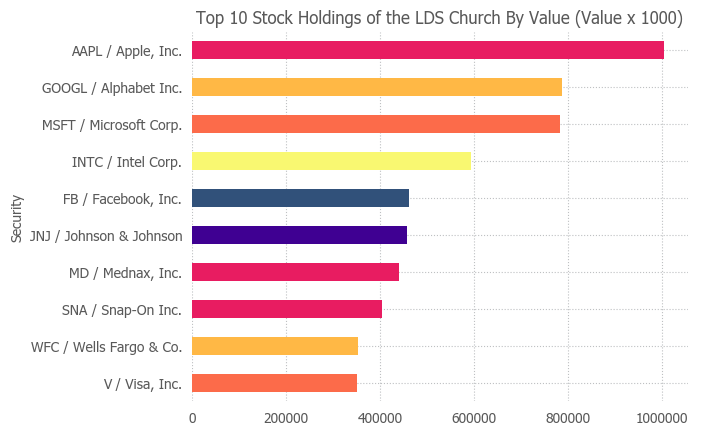

In [152]:
everything_df.groupby(by='Security', sort=True)['Current Value\n(USD x1000)'].sum().sort_values(ascending=False).head(10).plot(kind='barh', title="Top 10 Stock Holdings of the LDS Church By Value (Value x 1000)")
plt.gca().invert_yaxis()
plt.savefig('top10holdings.pdf')

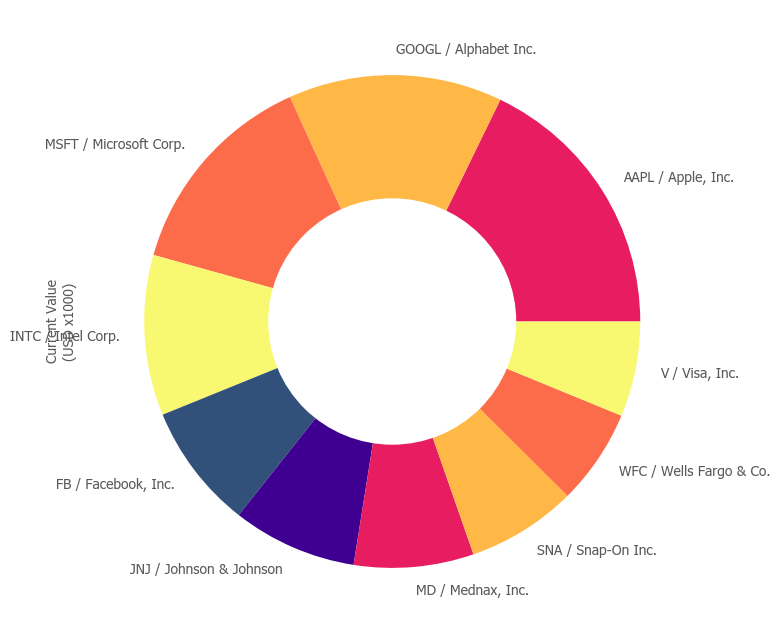

In [158]:
top10= everything_df.groupby(by='Security', sort=True)['Current Value\n(USD x1000)'].sum().sort_values(ascending=False).head(10).plot(kind='pie', figsize=(8, 8))
centercircle = plt.Circle((0,0),0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centercircle)
plt.savefig('top10holdings_pie.pdf')
# Apple: 1.005 billion
# Google: 786.8 million
# Microsoft: 782.3 million
# Intel: 593.6 million
# Facebook: 462.9 million
# Johnson & Johnson: 458.2 million
# Mednax: 440.1 million
# Snap-On: 404.9 million
# Wells Fargo: 353.3 million
# Visa: 352 million 
